# Lab Assignment 1: Data Cleaning

In [316]:
%matplotlib inline
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import timeit
import pylab 

import re
import seaborn as sns

# Loading data and remove duplicates

In [317]:
# path for raw data
path ='D:\Download\WBSIM_Lab1b\infrastructure\_roads2.csv'

df = pd.read_csv(path,index_col=None, header=0)

# Remove duplicates
df_raw = df.drop_duplicates(subset=['lon','lat','chainage'], keep=False)

# copy dataframe
df_orig = df.copy()

print('Total data before drop duplicates:' ,len(df),'Data')
print('Total data after drop duplicates:' ,len(df_raw),'Data')

Total data before drop duplicates: 52210 Data
Total data after drop duplicates: 51706 Data


In [318]:
df_road_value_counts =  df_raw['road'].value_counts().sort_values(ascending=False)

df_road_value_counts_above_30_data = df_road_value_counts[df_road_value_counts >= 30]
df_road_value_counts_under_30_data = df_road_value_counts[df_road_value_counts < 30]

df_road_index = df_raw['road'].value_counts().sort_values(ascending=False).index
#df_road_value_counts_under_30_data[df_road_value_counts_under_30_data.index.str.match('Z',case=True)]
#df_N_road[df_N_road['road'].str.match('N3',case=True)][0:271].plot.scatter(x='lat',y='lon')

In [319]:
def absolute_difference(dataframe,threshold = 0.65):
    
    error_lat_index = []
    error_lon_index = []
    dataframe.sort_values(by=['lat'])
    abs_diff_lat = abs(dataframe['lat'].diff()).shift(-1).sort_values(ascending=False)
    dataframe.sort_values(by=['lon'])
    abs_diff_lon = abs(dataframe['lon'].diff()).shift(-1).sort_values(ascending=False)
    
    error_lat_index = (abs_diff_lat[abs_diff_lat > threshold].index)
    error_lon_index = (abs_diff_lon[abs_diff_lon > threshold].index)   
    
    #error_lat_index = error_lat_index.shift(1)
    #error_lon_index = error_lon_index.shift(1)
    #mean_abs_lat_diff = .mean()
    #mean_abs_lon_diff = abs(dataframe['lon'].diff()).sort_values().mean()
    
    #std_abs_lat_diff = abs(dataframe['lat'].diff()).sort_values().std()
    #std_abs_lon_diff = abs(dataframe['lon'].diff()).sort_values().std()
    
    return error_lat_index,error_lon_index

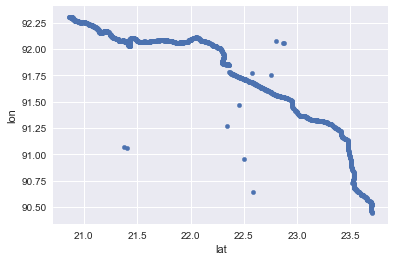

In [323]:
df_raw[df_raw['road'] == 'N1'].plot.scatter(x='lat',y='lon')

In [326]:

error_lat_index,error_lon_index = absolute_difference(df_raw[df_raw['road'] == 'N2'])

#df_raw['empty_data'] = False
df_raw.loc[error_lat_index,'empty_data'] = True
df_raw.loc[error_lat_index,'lat'] = np.nan
df_raw.loc[error_lon_index,'empty_data'] = True
df_raw.loc[error_lat_index,'lon'] = np.nan
df_raw['lat']= df_raw['lat'].interpolate(method='nearest')

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


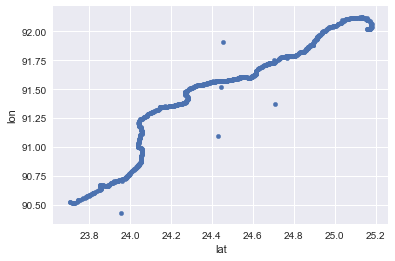

In [328]:
df_raw[df_raw['road'] == 'N2'].plot.scatter(x='lat',y='lon')

In [173]:
(abs(df_raw[df_raw['road'] == 'N1']['lat'].diff()).sort_values(ascending=False))[(abs(df_raw[df_raw['road'] == 'N1']['lat'].diff()).sort_values(ascending=False)) > 0.99].index
#.std()*10 + abs(df_raw[df_raw['road'] == 'N2']['lat'].diff()).mean()

Int64Index([818, 794, 233, 69, 154, 817, 155, 70, 234, 792], dtype='int64')

In [172]:
(abs(df_raw[df_raw['road'] == 'N1']['lon'].diff()).sort_values(ascending=False))[(abs(df_raw[df_raw['road'] == 'N1']['lon'].diff()).sort_values(ascending=False)) > 0.99]

994     1.001056
1017    1.000250
1016    0.999972
993     0.998750
Name: lon, dtype: float64

In [270]:
error_lat_index

Int64Index([817, 793, 232, 68, 153, 816, 154, 69], dtype='int64')

In [274]:
df_raw.ix[error_lat_index,'empty_data'] = True

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [275]:
df_raw.ix[error_lat_index]

,road,chainage,lrp,lat,lon,type,name,empty_data
817,N1,327.369,LRP332,22.802917,92.077277,KmPost,"Cox,s Bazar 63 km",True
793,N1,319.320,LRP324,22.870499,92.059139,KmPost,Info.Missing,True
232,N1,104.248,LRP107,23.346361,91.261694,KmPost,Km post missing,True
68,N1,26.629,LRP027,23.589611,90.631388,KmPost,Km post missing,True
153,N1,63.269,LRP064,23.502028,90.944889,KmPost,Km post Missing,True
816,N1,327.359,LRP331c,21.803028,92.077277,Bridge,Bridge end,True
154,N1,64.269,LRP065,22.499527,90.954167,KmPost,Km post Missing,True
69,N1,27.503,LRP027a,22.583750,90.636944,Bridge,Bridge start,True


In [32]:
#df_raw.sort_values(by=['road'])
(df_n['lat']).head()

0    23.706028
1    23.702917
2    23.702778
3    23.702139
4    23.697889
Name: lat, dtype: float64

In [50]:
((df_n['lon']).diff().sort_values()).head(10)

1016   -0.999972
993    -0.998750
538    -0.263860
758    -0.006917
738    -0.006667
954    -0.006360
948    -0.005306
871    -0.004944
965    -0.004806
961    -0.004500
Name: lon, dtype: float64

In [47]:
df_n = (df_raw[0:1338].sort_values(by=['chainage']))
((df_n['lon']).diff().sort_values()).std()
#abs(df_raw.sort_values(by=['road'])['lat'].diff())

0.055765559462191874

In [48]:
((df_n['lon']).diff().sort_values()).mean()

0.0013872475691847387

In [11]:
#abs(df_raw.sort_values(by=['road'])['lat'].diff())

In [ ]:
def absolute_difference_method(data,threshold = 3):
    
    data['lat'] = data['lat'].diff()
    data['lon'] = data['lon'].diff()

#  Define functions

In [4]:
# define filtering function
# 
# input:  dataframe of road, windowsize of mean/std, amount of std maximum allowed
# output: indices for lattitude errors and indices for longitude errors

def inspect(data, MeanWindow, StdWindow, threshold):
    
    # rolling standard deviation of lat and lon
    stdLat = data['lat'].rolling(window=StdWindow,min_periods=1,center=True).std()
    stdLon = data['lon'].rolling(window=StdWindow,min_periods=1,center=True).std()

    # moving average
    meanLat = data['lat'].rolling(window=MeanWindow,min_periods=1,center=True).mean()
    meanLon = data['lon'].rolling(window=MeanWindow,min_periods=1,center=True).mean()
    
    # determine errative values (Boolean)
    LatBool = abs(data['lat'] - meanLat) > threshold * stdLat
    LonBool = abs(data['lon'] - meanLon) > threshold * stdLon
    
    # determine index
    ErrorIndexLat = data.loc[LatBool,:].index
    ErrorIndexLon = data.loc[LonBool,:].index
    
    #print(meanLat.loc[785:795])
    #print(stdLat.loc[785:795])
    #print(data.loc[785:795,'lat'])
    
    # return output
    return ErrorIndexLat, ErrorIndexLon, LatBool, LonBool

In [5]:
# define interpolation of errors
#
# input:  dataframe of road, list of error index numbers, name of column to change eg: 'lat', 'lon'
# output: dataframe of road

def interp(data, erroridx, colname):
    
    #print('amount of errors: ', len(erroridx))
    values = []
    
    for i in range(len(erroridx)): # loop over all errors

        # determine interpolated value
        val = 0.5  * (data.loc[erroridx[i]-1,colname] + data.loc[erroridx[i]+1,colname])
    
        # add value to set 
        values.append(val)
    
    # set output
    
    return values

#  Order data by roads

In [6]:
# find road lenghts of individual roads
road_lengths = df['road'].value_counts().sort_index()
road_start = []
for i in range(len(df.road.unique())):
    
    road_start.append(sum(road_lengths[0:i]))
road_start.append(len(df))


# Loop for detecting errative Lat and Lon values

In [7]:
# set filtering variables
WinMean   = 5   # size of moving average window
WinStd    = 30  # size of std window
threshold = 2.2   # maximum allowed strandard deviation difference
maxIter   = 10  # maximum amount of iteration steps allowed per road

# create empty lists
ErLat = []
ErLon = []

counter = 0
check   = 0
iterat  = []

# time calculation time
start = timeit.default_timer()

# loop for al N roads
for i in range(len(road_indices)):
    
    counter = counter + 1
    # startpoint
    sp = road_start[i]
    ep = road_start[i+1]
    
    # selecting data
    roadFrame = df[sp:ep]
    
    # iteration counter
    iterat.append(check)
    
    # reset check value
    check = 0
    
    # continuously solving more points
    while (check < maxIter ): # maximum 4 iterations allowed

        ErrativeLat, ErrativeLon, LatBool, LonBool = inspect(roadFrame, WinMean, WinStd, threshold)
        
        # append to error list
        ErLat.append(ErrativeLat)
        ErLon.append(ErrativeLon)
        
        # determine if dataset is correct or not
        if len(ErrativeLat) + len(ErrativeLon) ==0 : # end while loop 
            check = 100
        else:
            
            # select new dataframe without errative values for next iteration
            roadFrame = roadFrame[~LatBool & ~LonBool]
            
            # set check counter
            check = check + 1
    
stop = timeit.default_timer()

print('time elapsed for error detection: ', stop-start)
print('roads checked: ', counter)
#print('number of iterations per road: ', iterat)


NameError: name 'road_indices' is not defined

# Replace errative values with interpolation

In [315]:
# create complete list with errors
ErLonList = [y for x in ErLon for y in x]
ErLatList = [y for x in ErLat for y in x]
print('amount of errative longitude values found: ', len(ErLonList))
print('amount of errative lattitude values found: ', len(ErLatList))

amount of errative longitude values found:  29
amount of errative lattitude values found:  30


In [316]:
# create interpolation
inLon = interp(df, ErLonList, 'lon')
inLat = interp(df, ErLatList, 'lat')

# replace values for interpolation
df.loc[ErLatList,'lat'] = inLat
df.loc[ErLonList,'lon'] = inLon

# Save data back to csv

In [320]:
df.to_csv('_roads2.csv')

## validating data (this section is not to be submitted)

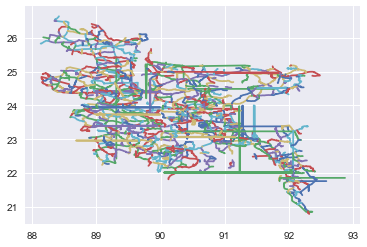

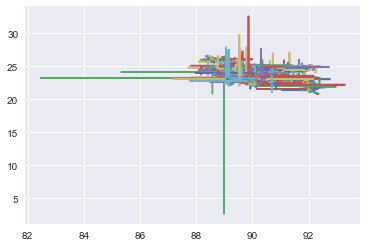

In [321]:
# 
ep = -1
fig, ax = plt.subplots()
fig, ax2 = plt.subplots()

for i in range(len(road_indices)):
    # startpoint
    sp = road_start[i]
    ep = road_start[i+1]  
    
    # selecting data
    roadFrame = df[sp:ep]
    ax.plot(roadFrame.loc[:,'lon'], roadFrame.loc[:,'lat'])
    
    # selecting originial data
    roadFrame2 = df_orig[sp:ep]
    ax2.plot(roadFrame2.loc[:,'lon'], roadFrame2.loc[:,'lat'])

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


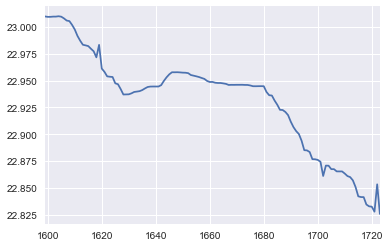

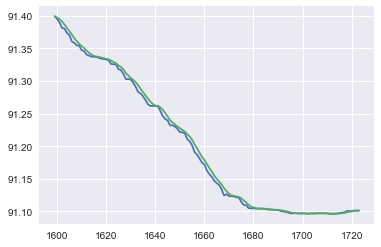

In [271]:
#road number
nr = 4

sp = road_start[nr]
ep = road_start[nr+1]

data = df[sp:ep]
# rolling standard deviation of lat and lon
stdLat = data['lat'].rolling(window=30,min_periods=1,center=True).std()
stdLon = data['lon'].rolling(window=30,min_periods=1,center=True).std()

# moving average
meanLat = data['lat'].rolling(window=4,min_periods=1,center=False).mean()
meanLon = data['lon'].rolling(window=4,min_periods=1,center=False).mean()

# determine errative values (Boolean)
LatBool = abs(data['lat'] - meanLat) > 3 * stdLat
LonBool = abs(data['lon'] - meanLon) > 3 * stdLon

# determine index
ErrorIndexLat = data.loc[LatBool,:].index
ErrorIndexLon = data.loc[LonBool,:].index

#erlat, erlon, latb, lonb = inspect(df[sp:ep],5, 30, 2)
print(ErrorIndexLat)

df[sp:ep]['lat'].plot()
print(ErrorIndexLon)

fig, ax = plt.subplots()

ax.plot(df[sp:ep]['lon'])
ax.plot(meanLon)
#print(df[sp:ep])

lenght is : 36


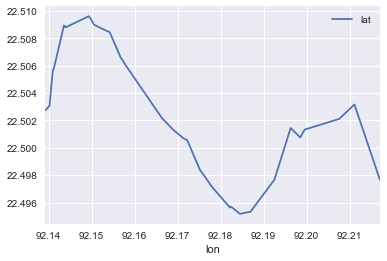

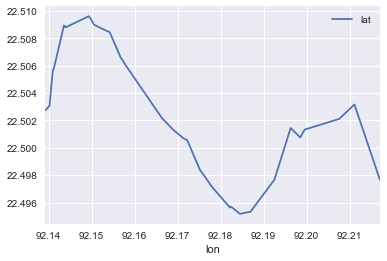

In [310]:
#road number
nr = 115

sp = road_start[nr]
ep = road_start[nr+1]
print('lenght is :', len(df[sp:ep]))
df[sp:ep].plot(x = 'lon', y = 'lat')
df_orig[sp:ep].plot(x = 'lon', y = 'lat')
#print(df[sp:ep])


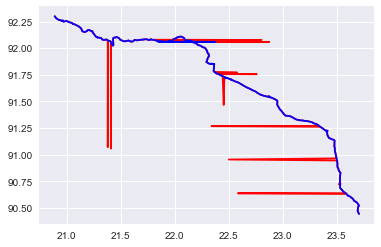

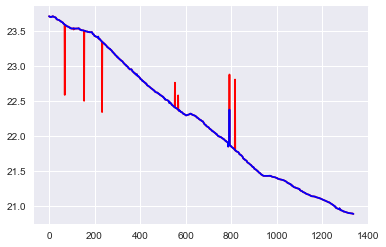

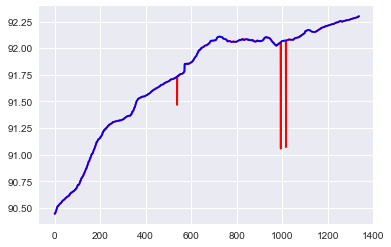

In [318]:
# verifying the data

fig, ax = plt.subplots()
ax.plot(df_orig[0:1338]['lat'],df_orig[0:1338]['lon'],'r')
ax.plot(df[0:1338]['lat'],df[0:1338]['lon'],'b')

fig, ax = plt.subplots()
ax.plot(df_orig[0:1338]['lat'],'r')
ax.plot(df[0:1338]['lat'],'b')

fig, ax = plt.subplots()
ax.plot(df_orig[0:1338]['lon'],'r')
ax.plot(df[0:1338]['lon'],'b')

In [299]:
ErLat, ErLon = inspect(df[0:1338], 4, 4, 3)
print(ErLat)
print(ErLon)

print(len(ErLat)+len(ErLon))

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
0


In [148]:
#Find data that have N,R,Z road name
df_N_road = df_clean_0[df_clean_0['road'].str.match('N',case=True, as_indexer=True)]
df_R_road = df_clean_0[df_clean_0['road'].str.match('R',case=True, as_indexer=True)]
df_Z_road = df_clean_0[df_clean_0['road'].str.match('Z',case=True, as_indexer=True)]

# Sort the dataframe based on values
df_N_road.sort_values(by=['road'])
df_R_road.sort_values(by=['road'])
df_Z_road.sort_values(by=['road'])

# Show summary of information data
print('Total N Roads Data:', len(df_N_road))
print('Total R Roads Data:', len(df_R_road))
print('Total Z Roads Data:', len(df_Z_road))
print('Total All Roads Data:', len(df_N_road)+len(df_R_road)+len(df_Z_road))

Total N Roads Data: 9722
Total R Roads Data: 9831
Total Z Roads Data: 32153
Total All Roads Data: 51706


In [149]:
# Count the number of data based on the road name ('road')
N_road_data_counts = df_N_road['road'].value_counts().sort_index()
R_road_data_counts = df_R_road['road'].value_counts().sort_index()
Z_road_data_counts = df_Z_road['road'].value_counts().sort_index()

# Count the how many road are there
Unique_N_road = len(N_road_data_counts)
Unique_R_road = len(R_road_data_counts)
Unique_Z_road = len(Z_road_data_counts)

print('There are','[', Unique_N_road,']', 'N roads')
print('There are','[', Unique_R_road,']', 'R roads')
print('There are','[', Unique_Z_road,']', 'Z roads')

There are [ 95 ] N roads
There are [ 125 ] R roads
There are [ 656 ] Z roads


32
32
2059    N107
Name: road, dtype: object


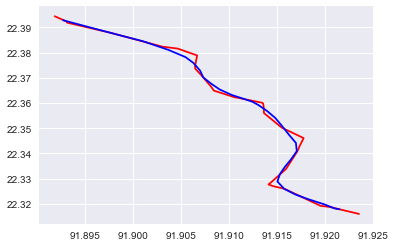

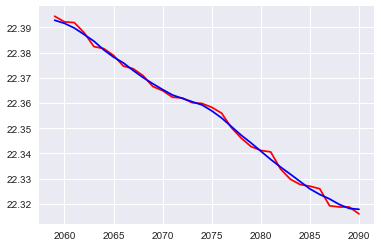

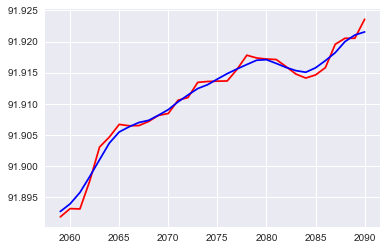

In [276]:


# starting endpoint
i  = 7

#for i in range(Unique_N_road):
    
# startpoin
sp = sum(road_indices[0:i])
ep = sp + road_indices[i]
    
# selecting data
roadFrame = df[sp:ep]
    
# moving average
meanLat = roadFrame['lat'].rolling(window=5,min_periods=1,center=True).mean()
meanLon = roadFrame['lon'].rolling(window=5,min_periods=1,center=True).mean()
    
# plot
fig, ax = plt.subplots()
ax.plot(df[sp:ep]['lon'],df[sp:ep]['lat'],color='r')
ax.plot(meanLon,meanLat,color='b')


# plot lat
fig, ax2 = plt.subplots()
ax2.plot(df[sp:ep]['lat'],color='r')
ax2.plot(meanLat,color='b')

# plot lon
fig, ax = plt.subplots()
ax.plot(df[sp:ep]['lon'],color='r')
ax.plot(meanLon,color='b')


# print values
print(len(meanLat))
print(len(df[sp:ep]))
print(df[sp:sp+1]['road'])

C:\Users\Marti\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bottom left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


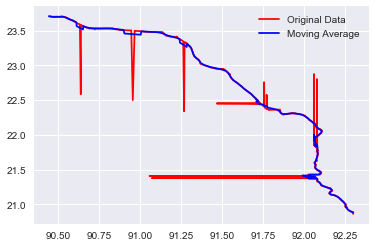

In [151]:
meanLat = df_clean_0[0:1338]['lat'].rolling(window=Win,min_periods=1,center=False).mean()
meanLon = df_clean_0[0:1338]['lon'].rolling(window=Win,min_periods=1,center=False).mean()

#colors = mpl.cm.rainbow(np.linspace(0, 1, len(N_road_data_counts)))
fig, ax = plt.subplots()
ax.plot(df_clean_0[0:1338]['lon'],df_clean_0[0:1338]['lat'],'r',label='Original Data')
ax.plot(meanLon,meanLat,color='b',label='Moving Average')

pylab.legend(loc='upper right')


In [308]:
print(df_clean.loc[ErLonList[1],'lon'])
print(df_clean.loc[ErLonList[1]-1,'lon'])
print(df_clean.loc[ErLonList[1]+1,'lon'])


92.0559028
92.05475
92.0570556


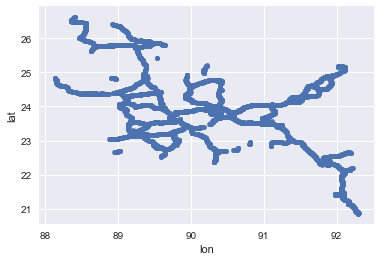

In [153]:
# plot filtered data
#Find data that have N,R,Z road name
df_N_road = df_clean_0[df_clean_0['road'].str.match('N',case=True, as_indexer=True)]
df_R_road = df_clean_0[df_clean_0['road'].str.match('R',case=True, as_indexer=True)]
df_Z_road = df_clean_0[df_clean_0['road'].str.match('Z',case=True, as_indexer=True)]

# Sort the dataframe based on values
df_N_road.sort_values(by=['road'])
df_R_road.sort_values(by=['road'])
df_Z_road.sort_values(by=['road'])


# plot N roads
df_N_road.plot.scatter(x='lon',y='lat')

In [319]:
# plot filtered data
df_R_road.plot.scatter(x='lon',y='lat')

NameError: name 'df_R_road' is not defined

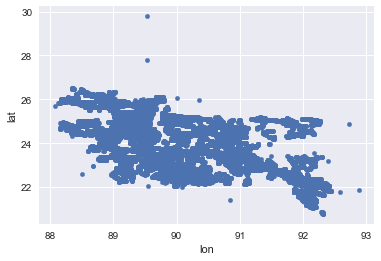

In [155]:
# plot filtered data
df_Z_road.plot.scatter(x='lon',y='lat')

# Save data back to CSV (not finished)

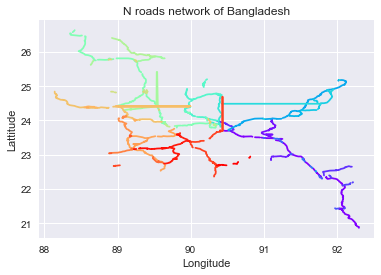

In [156]:
ep = 0
colors = mpl.cm.rainbow(np.linspace(0, 1, len(N_road_data_counts)))
fig, ax = plt.subplots()
for i in range(len(N_road_data_counts)):
    
    # startpoint
    sp = ep
    ep = ep + N_road_data_counts[i]
    
    # selecting data
    df_N_road = df_clean_0[df_clean_0['road'].str.match('N',case=True, as_indexer=True)]
    df_N_road1 = df_N_road[sp:ep]
    #roadFrame = df_clean_0[sp:ep]
    
    # reset check value
    ax.plot(df_N_road1['lon'],df_N_road1['lat'],color=colors[i])
    #df_N_road1.plot(x='lon',y='lat',colours[i])
    #plt.show()
    plt.title('N roads network of Bangladesh')
    plt.xlabel('Longitude')
    plt.ylabel('Lattitude')
    

In [157]:
dk = pd.DataFrame()
dk = dk.append(df_N_road['road'].value_counts()>100)
dk = dk.transpose()
dk = dk.reset_index()
dk = dk.rename(index=str, columns={"road": "N road > 100","index":"road"})
dk.head()


,road,N road > 100
0,N1,1.0
1,N101,0.0
2,N102,1.0
3,N103,0.0
4,N104,1.0


In [158]:
outliers = []

In [159]:
errors = 3, 4, 5
outliers.append(errors)
print(outliers)

[(3, 4, 5)]


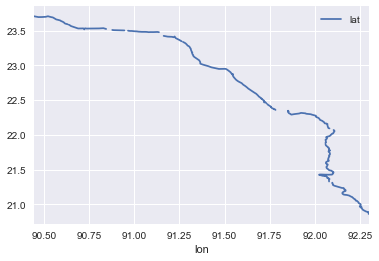

In [160]:
# define start and endpositions
startpoint = 0
endpoint  = 1338
threshold = 4 # amounts of allowed sigma deviation from mean
window    = 20 # size of window for moving average/mean




# create dataframe and plot original data
testframe = df_N_road[startpoint:endpoint]


testframe.plot(x = 'lon', y = 'lat')
